In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import pandas as pd
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as dates
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from scipy.stats import norm

In [3]:
plt.rcParams.update({'font.size': 16,
                     'legend.fontsize': 'x-large',
                     'figure.figsize': (15, 5),
                     'axes.labelsize': 'x-large',
                     'axes.titlesize':16,
                     'xtick.labelsize':16,
                     'ytick.labelsize':16})
plt.style.use('ggplot')

# 1. Read Data and Explore the Data

The data consists of a set of implied volatility smiles for four assets at a set of fixed Deltas

This section is to explore the implied volatility surfaces of call options written on the four stocks: Amazon, IBM, Intel, and Tesla

## 1.1 Amazon Data

In [4]:
import pickle
amazon = pickle.load(open('AMZN.pkl','rb'))

In [5]:
amazon

{'Delta': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
        0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 'IV': array([[0.269342, 0.266901, 0.265748, ..., 0.296086, 0.302302, 0.309482],
        [0.258672, 0.2564  , 0.255428, ..., 0.286679, 0.293895, 0.303722],
        [0.256394, 0.256526, 0.256874, ..., 0.298364, 0.309594, 0.326955],
        ...,
        [0.389939, 0.378566, 0.368903, ..., 0.37189 , 0.387685, 0.423886],
        [0.387682, 0.375462, 0.365487, ..., 0.373161, 0.394549, 0.439492],
        [0.385404, 0.371975, 0.361785, ..., 0.369758, 0.391158, 0.43447 ]]),
 'dates': array([20170103, 20170104, 20170105, ..., 20201229, 20201230, 20201231])}

In [6]:
def XYaxis(data):
    '''
    This function returns the X-axis(Delta) and Y-axis(Calendar Date) for 3D surface plot
    '''
    delta = data["Delta"]
    IV = data["IV"]
    integer_dates = data["dates"]
    
    # convert datetime from integer to date time type
    numpy_dates = np.array(pd.to_datetime(integer_dates.astype(str)).values, dtype='datetime64[D]')
    
    delta_m, date_m = np.meshgrid(delta,numpy_dates)
    
    yt = [[dates.date2num(d) for d in xi] for xi in date_m]
    
    return delta_m, yt

In [7]:
amazon_x_axis, amazon_y_axis = XYaxis(amazon)

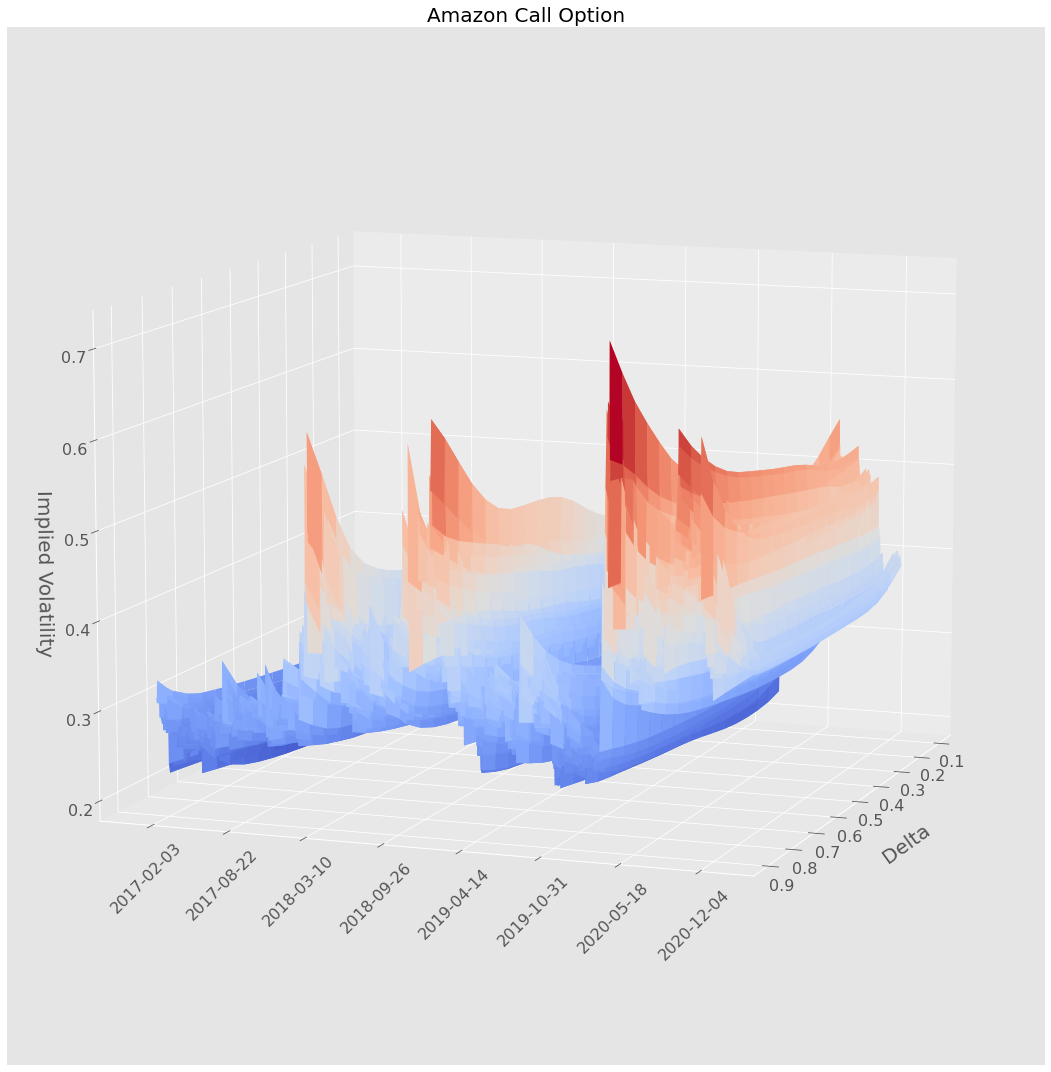

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection':"3d"},figsize=(15,15))
ax = plt.gca()
surf = ax.plot_surface(amazon_x_axis, amazon_y_axis, amazon["IV"], cmap=cm.coolwarm,linewidth=3, antialiased=True, rstride=1, cstride=1, alpha=None)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 10
plt.yticks( rotation=45, fontsize=16 )
plt.xticks(fontsize=16)
ax.tick_params(labelsize=16)
xfmt = dates.DateFormatter('%Y-%m-%d')
ax.yaxis.set_major_formatter(xfmt)
ax.set_xlabel('Delta',fontsize=20)
ax.set_zlabel('Implied Volatility',fontsize=20)
#ax.set_ylabel('Dates')
ax.set_title("Amazon Call Option",fontsize=20)
ax.view_init(elev=10,azim=20)
plt.tight_layout()
plt.show()

## 1.2 IBM Data

In [9]:
IBM = pickle.load(open('IBM.pkl','rb'))

In [10]:
IBM

{'Delta': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
        0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 'IV': array([[0.182159, 0.182086, 0.183211, ..., 0.215289, 0.218395, 0.22341 ],
        [0.181358, 0.181116, 0.182045, ..., 0.228705, 0.248106, 0.274456],
        [0.180879, 0.180617, 0.181627, ..., 0.22293 , 0.232732, 0.249881],
        ...,
        [0.275346, 0.269507, 0.267116, ..., 0.311451, 0.328941, 0.35447 ],
        [0.278257, 0.271823, 0.268796, ..., 0.321387, 0.352444, 0.402347],
        [0.273124, 0.265862, 0.262716, ..., 0.296332, 0.301924, 0.307975]]),
 'dates': array([20170103, 20170104, 20170105, ..., 20201229, 20201230, 20201231])}

In [11]:
IBM_x_axis, IBM_y_axis = XYaxis(IBM)

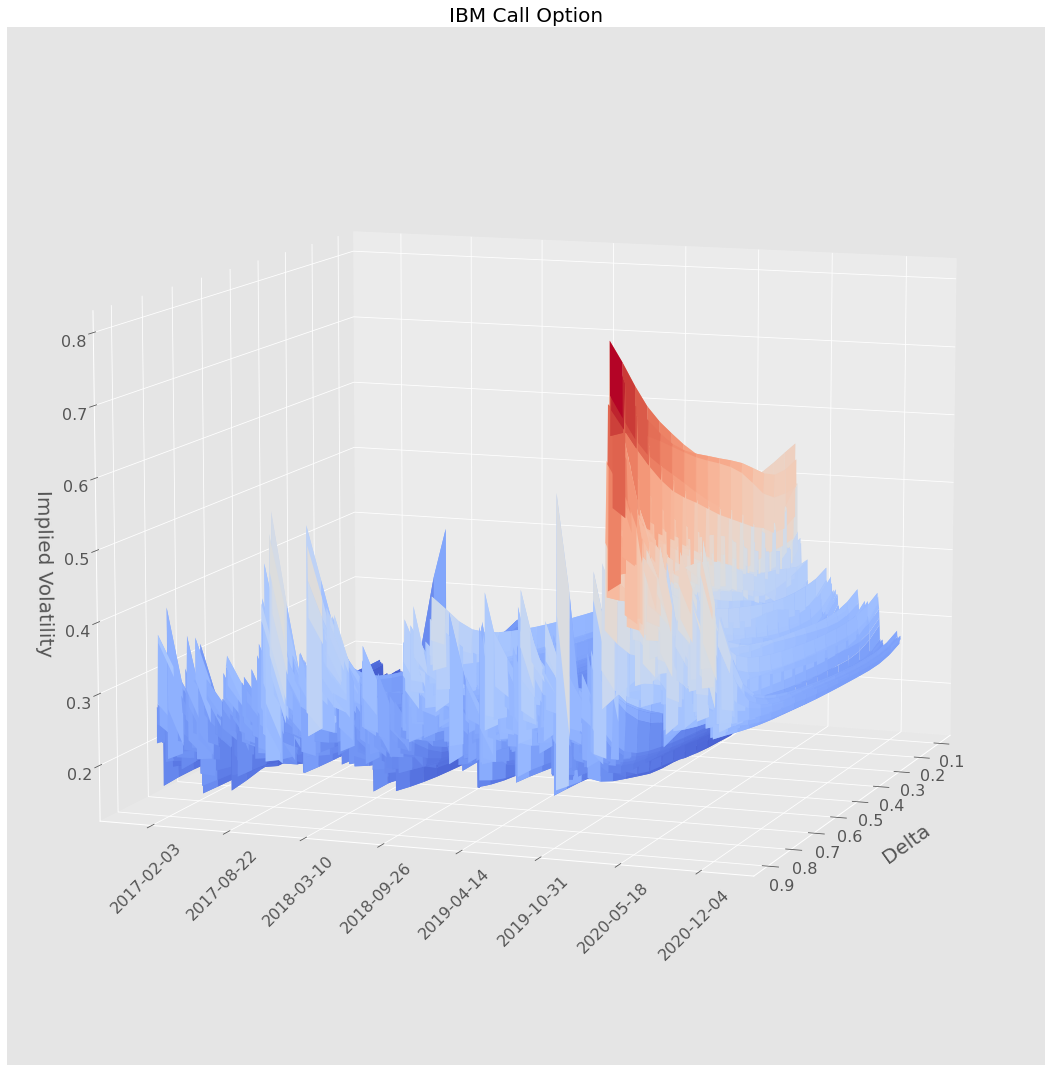

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection':"3d"},figsize=(15,15))
ax = plt.gca()
surf = ax.plot_surface(IBM_x_axis, IBM_y_axis, IBM["IV"], cmap=cm.coolwarm,linewidth=3, antialiased=True, rstride=1, cstride=1, alpha=None)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 10
plt.yticks( rotation=45, fontsize=16 )
plt.xticks(fontsize=16)
ax.tick_params(labelsize=16)
xfmt = dates.DateFormatter('%Y-%m-%d')
ax.yaxis.set_major_formatter(xfmt)
ax.set_xlabel('Delta',fontsize=20)
ax.set_zlabel('Implied Volatility',fontsize=20)
#ax.set_ylabel('Dates')
ax.set_title("IBM Call Option",fontsize=20)
ax.view_init(elev=10,azim=20)
plt.tight_layout()
plt.show()

## 1.3 Intel Corporation Data

In [13]:
intel = pickle.load(open('INTC.pkl','rb'))

In [14]:
intel

{'Delta': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
        0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 'IV': array([[0.205472, 0.207142, 0.209017, ..., 0.273093, 0.277982, 0.276333],
        [0.209743, 0.210726, 0.212209, ..., 0.300813, 0.350978, 0.400002],
        [0.205892, 0.206294, 0.207507, ..., 0.267651, 0.290815, 0.317285],
        ...,
        [0.389803, 0.376563, 0.36632 , ..., 0.394974, 0.415257, 0.440152],
        [0.388183, 0.375947, 0.366983, ..., 0.388406, 0.409631, 0.43889 ],
        [0.388482, 0.376437, 0.367882, ..., 0.396293, 0.423121, 0.463127]]),
 'dates': array([20170103, 20170104, 20170105, ..., 20201229, 20201230, 20201231])}

In [15]:
intel_x_axis, intel_y_axis = XYaxis(intel)

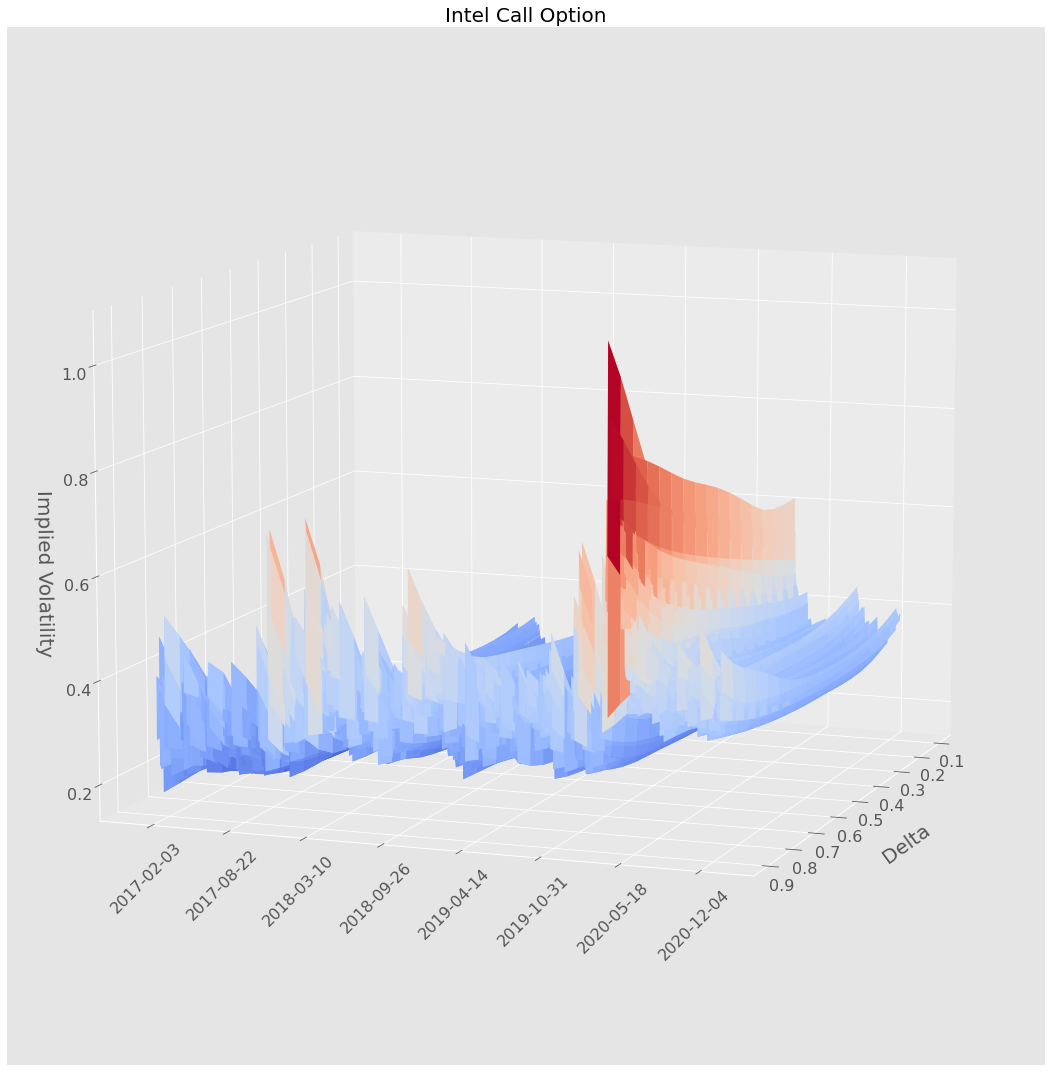

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection':"3d"},figsize=(15,15))
ax = plt.gca()
surf = ax.plot_surface(intel_x_axis, intel_y_axis, intel["IV"], cmap=cm.coolwarm,linewidth=3, antialiased=True, rstride=1, cstride=1, alpha=None)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 10
plt.yticks( rotation=45, fontsize=16 )
plt.xticks(fontsize=16)
ax.tick_params(labelsize=16)
xfmt = dates.DateFormatter('%Y-%m-%d')
ax.yaxis.set_major_formatter(xfmt)
ax.set_xlabel('Delta',fontsize=20)
ax.set_zlabel('Implied Volatility',fontsize=20)
#ax.set_ylabel('Dates')
ax.set_title("Intel Call Option",fontsize=20)
ax.view_init(elev=10,azim=20)
plt.tight_layout()
plt.show()

## 1.4 Tesla Data

In [17]:
tesla = pickle.load(open('TSLA.pkl','rb'))

In [18]:
tesla_x_axis, tesla_y_axis = XYaxis(tesla)

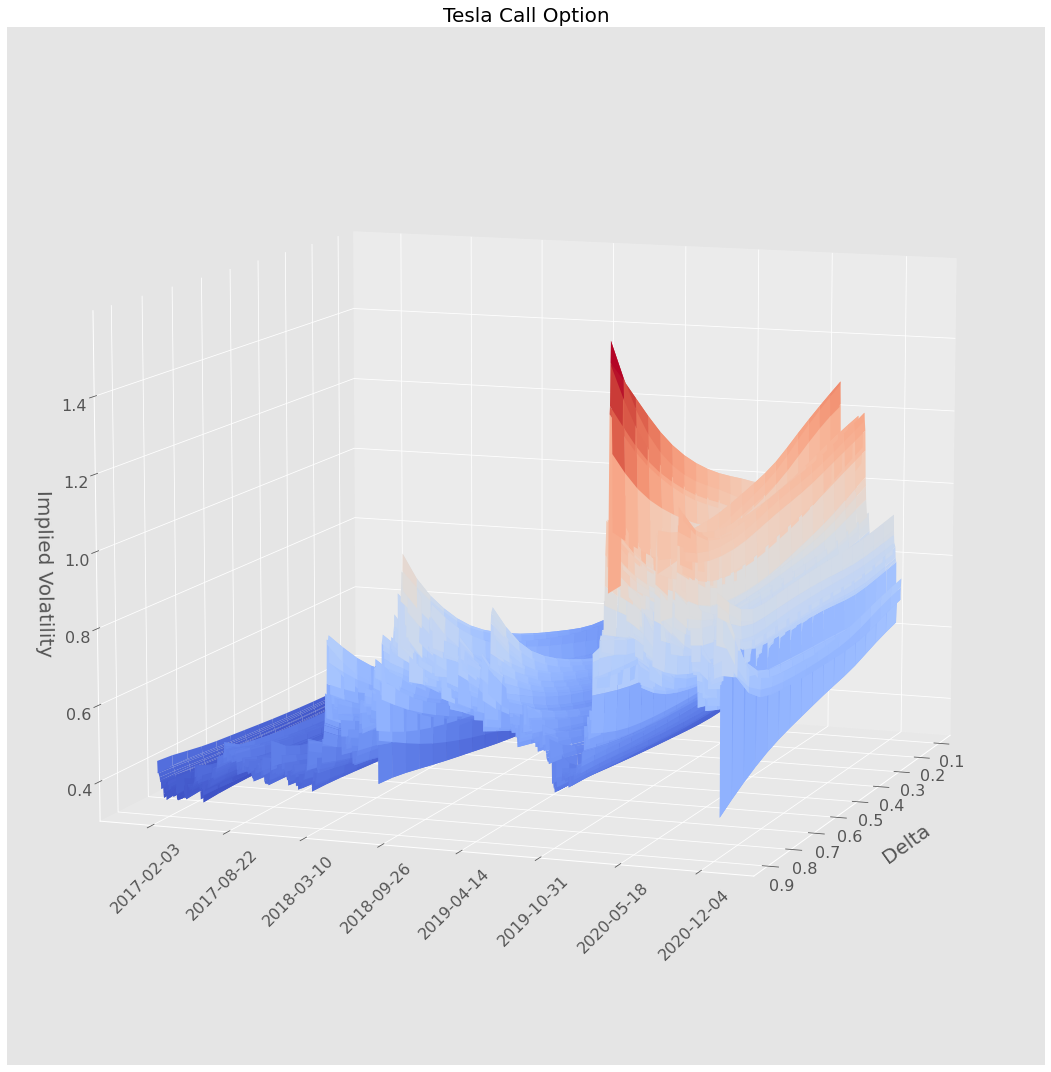

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection':"3d"},figsize=(15,15))
ax = plt.gca()
surf = ax.plot_surface(tesla_x_axis, tesla_y_axis, tesla["IV"], cmap=cm.coolwarm,linewidth=3, antialiased=True, rstride=1, cstride=1, alpha=None)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 10
plt.yticks( rotation=45, fontsize=16 )
plt.xticks(fontsize=16)
ax.tick_params(labelsize=16)
xfmt = dates.DateFormatter('%Y-%m-%d')
ax.yaxis.set_major_formatter(xfmt)
ax.set_xlabel('Delta',fontsize=20)
ax.set_zlabel('Implied Volatility',fontsize=20)
#ax.set_ylabel('Dates')
ax.set_title("Tesla Call Option",fontsize=20)
ax.view_init(elev=10,azim=20)
plt.tight_layout()
plt.show()

## 1.5 Average of IV for Each Year

This section shows the mean implied volatility of each year from 2017 to 2020 for these four companies.

In [20]:
dates = amazon["dates"]
dates

array([20170103, 20170104, 20170105, ..., 20201229, 20201230, 20201231])

In [21]:
# end of year of 2017
end_2017 = dates[250]
end_2017

20171229

In [22]:
# end of year of 2018
end_2018 = dates[501]
end_2018

20181231

In [23]:
# end of year of 2019
end_2019 = dates[753]
end_2019

20191231

In [24]:
# end of year of 2020
end_2020 = dates[-1]
end_2020

20201231

In [25]:
def average_IV(data):
    
    # 2017 average IV
    avg_IV_2017 = np.mean(data["IV"][:251],axis=0)
    
    # 2018 average IV
    avg_IV_2018 = np.mean(data["IV"][251:502],axis=0)
    
    # 2019 average IV
    avg_IV_2019 = np.mean(data["IV"][502:754],axis=0)
    
    # 2020 average IV
    avg_IV_2020 = np.mean(data["IV"][754:],axis=0)
    
    return avg_IV_2017, avg_IV_2018, avg_IV_2019, avg_IV_2020

In [26]:
# Amazon average IV
amazon_avg_IV_2017, amazon_avg_IV_2018, amazon_avg_IV_2019, amazon_avg_IV_2020 = average_IV(amazon)

In [27]:
# IBM average IV
IBM_avg_IV_2017, IBM_avg_IV_2018, IBM_avg_IV_2019, IBM_avg_IV_2020 = average_IV(IBM)

In [28]:
# intel average IV
intel_avg_IV_2017, intel_avg_IV_2018, intel_avg_IV_2019, intel_avg_IV_2020 = average_IV(intel)

In [29]:
# tesla average IV
tesla_avg_IV_2017, tesla_avg_IV_2018, tesla_avg_IV_2019, tesla_avg_IV_2020 = average_IV(tesla)

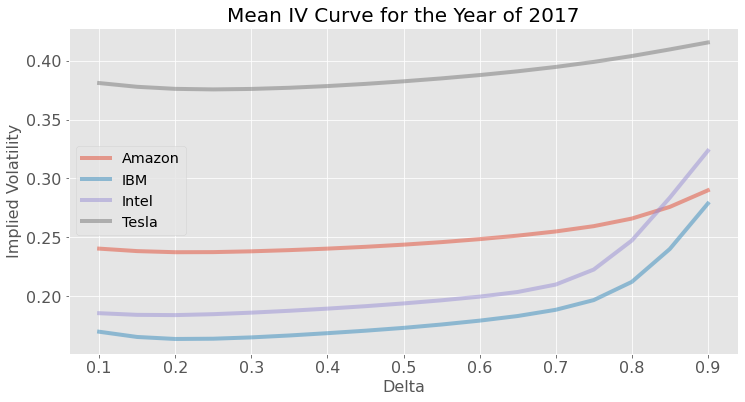

In [30]:
plt.figure(figsize=(12,6))
plt.plot(amazon["Delta"], amazon_avg_IV_2017,alpha=0.5,linewidth=4,label="Amazon")
plt.plot(IBM["Delta"],IBM_avg_IV_2017,alpha=0.5,linewidth=4,label="IBM")
plt.plot(intel["Delta"],intel_avg_IV_2017,alpha=0.5,linewidth=4,label="Intel")
plt.plot(tesla["Delta"],tesla_avg_IV_2017,alpha=0.5,linewidth=4,label="Tesla")
plt.legend(loc="center left")
plt.title("Mean IV Curve for the Year of 2017",fontsize=20)
plt.xlabel("Delta",fontsize=16)
plt.ylabel("Implied Volatility",fontsize=16)
plt.show()

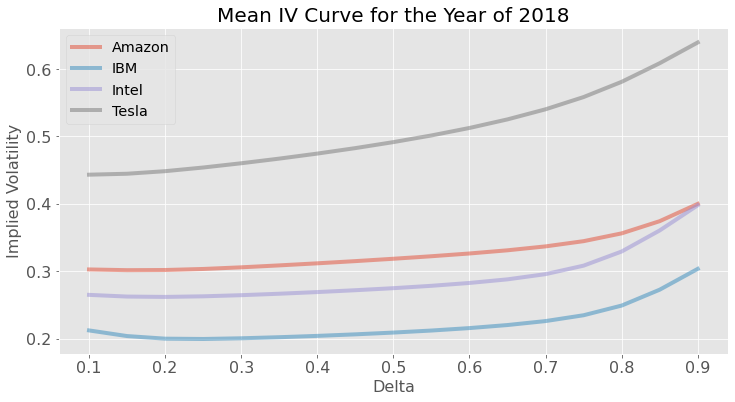

In [31]:
plt.figure(figsize=(12,6))
plt.plot(amazon["Delta"], amazon_avg_IV_2018,alpha=0.5,linewidth=4,label="Amazon")
plt.plot(IBM["Delta"],IBM_avg_IV_2018,alpha=0.5,linewidth=4,label="IBM")
plt.plot(intel["Delta"],intel_avg_IV_2018,alpha=0.5,linewidth=4,label="Intel")
plt.plot(tesla["Delta"],tesla_avg_IV_2018,alpha=0.5,linewidth=4,label="Tesla")
plt.legend(loc="upper left")
plt.title("Mean IV Curve for the Year of 2018",fontsize=20)
plt.xlabel("Delta",fontsize=16)
plt.ylabel("Implied Volatility",fontsize=16)
plt.show()

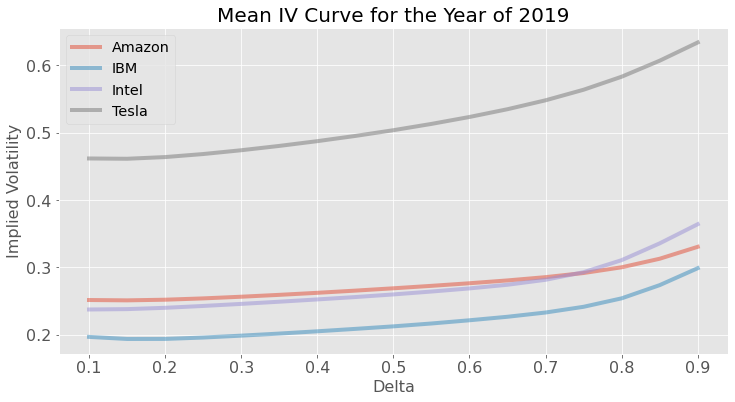

In [32]:
plt.figure(figsize=(12,6))
plt.plot(amazon["Delta"], amazon_avg_IV_2019,alpha=0.5,linewidth=4,label="Amazon")
plt.plot(IBM["Delta"],IBM_avg_IV_2019,alpha=0.5,linewidth=4,label="IBM")
plt.plot(intel["Delta"],intel_avg_IV_2019,alpha=0.5,linewidth=4,label="Intel")
plt.plot(tesla["Delta"],tesla_avg_IV_2019,alpha=0.5,linewidth=4,label="Tesla")
plt.legend(loc="upper left")
plt.title("Mean IV Curve for the Year of 2019",fontsize=20)
plt.xlabel("Delta",fontsize=16)
plt.ylabel("Implied Volatility",fontsize=16)
plt.show()

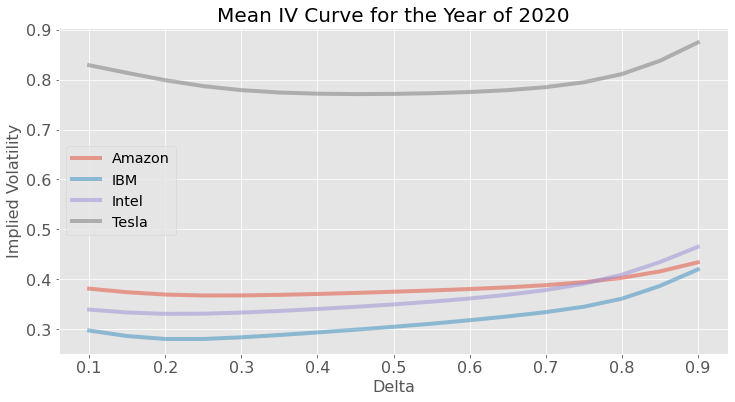

In [33]:
plt.figure(figsize=(12,6))
plt.plot(amazon["Delta"], amazon_avg_IV_2020,alpha=0.5,linewidth=4,label="Amazon")
plt.plot(IBM["Delta"],IBM_avg_IV_2020,alpha=0.5,linewidth=4,label="IBM")
plt.plot(intel["Delta"],intel_avg_IV_2020,alpha=0.5,linewidth=4,label="Intel")
plt.plot(tesla["Delta"],tesla_avg_IV_2020,alpha=0.5,linewidth=4,label="Tesla")
plt.legend(loc="center left")
plt.title("Mean IV Curve for the Year of 2020",fontsize=20)
plt.xlabel("Delta",fontsize=16)
plt.ylabel("Implied Volatility",fontsize=16)
plt.show()

# 2. VAE Model

In this section, I build a three latent factor VAE model to generate the mean IV curve for each stock.

## 2.1 VAE Model Infrastracture Functions

In [34]:
class NormalNet(nn.Module):
    
    def __init__(self, nIn, nNodes, nLayers, nOut):
        super(NormalNet, self).__init__()
        
        # single hidden layer
        self.prop_in_to_h = nn.Linear( nIn, nNodes )
        
        # hidden to hidden
        self.prop_h_to_h = []
        for i in range(nLayers-1):
            self.prop_h_to_h.append(nn.Linear(nNodes, nNodes))
            
        # for generating the mean and covariance
        self.prop_h_to_out = nn.Linear(nNodes, int(nOut + nOut*(nOut+1)/2))
        
        self.nOut = nOut
    
    def forward(self,x):
        
        # input into hidden layer
        h = torch.sigmoid(self.prop_in_to_h(x))
        
        for prop in self.prop_h_to_h:
            h = torch.relu(prop(h))
        
        # hidden layer to output layer - no activation
        y = self.prop_h_to_out(h)
        
        # take the first nOut of the output as mean
        # the first dimension is batch size
        mu = y[:,:self.nOut]
        
        # take the remaining to generate the covariance matrix
        # this temp cannot be guaranteed as semi-positive matrix
        #temp = y[:,nOut:].reshape(-1,nOut,nOut)
        U = torch.zeros((mu.shape[0], self.nOut, self.nOut))
        
        tril_indices = torch.tril_indices(row=self.nOut, col=self.nOut, offset=0)
        
        U[:,tril_indices[0], tril_indices[1]] = y[:, self.nOut:]
        
        I = torch.zeros(U.shape)
        rng = range(U.shape[1])
        I[:,rng,rng] = 1
        
        # the simple way to get the semi-positive definite matrix is times its transpose
        #Sigma = torch.matmul(temp, torch.transpose(temp,1,2))
        Sigma = torch.matmul(U, torch.transpose(U,1,2)) + 1e-3*I
        
        return mu, Sigma
    
    def parameters(self):
        
        params = list(self.prop_in_to_h.parameters())
        for prop in self.prop_h_to_h:
            params += list(prop.parameters())
            
        params += list(self.prop_h_to_out.parameters())
        
        return params

In [35]:
def GrabMiniBatch(data, batch_size):
    
    company_IV = data["IV"]
    idx = np.random.randint(0,company_IV.shape[0],batch_size)
        
    return torch.tensor(company_IV[idx,:]).float()

In [36]:
def ReconLoss(x, encode_net, decode_net):
        # estimate E^{Q[Z|X=x]}[ log P(X=x | Z ) ]
        
        # encode x's to find mean/cov for Z
        mu_q, Sigma_q = encode_net(x)
    
        # get a single sample from the dist of z per x sample using "reparametrisation" trick
        Z = torch.distributions.MultivariateNormal(mu_q, Sigma_q)
        z = Z.rsample()
        
        # decode the z's to find mean/cov for X
        mu_p, Sigma_p = decode_net(z)
        
        # compute log_prob evaluated at observerd data
        X = torch.distributions.MultivariateNormal(mu_p, Sigma_p)
        
        return torch.mean( X.log_prob(x) ) 

In [37]:
def KL(x, encode_net):
    # compute KL[ Q(Z|X=x) | P(Z) ], where P(Z)  is standard indepedent normal
    
    # the variational approximation of the posterior Q(Z|X=x)
    mu_q, Sigma_q = encode_net(x)
    
    # the dimension of the latent variables
    d = mu_q.shape[1]      

    # log ( det Sigma_q )
    A = torch.log( torch.det(Sigma_q)  ) 
    
    # Tr( Sigma_q )
    C = torch.einsum('ijj->i',Sigma_q)
    
    # mu_q' mu_q
    D = torch.einsum('ij,ij->i', mu_q, mu_q)
    
    return torch.mean(0.5* ( -A -d + C + D ))

In [38]:
def KL_class(mu_p, Sigma_p, mu_q, Sigma_q):
    
    # log(det Sigma_q / det Sigma_p)
    A = torch.log( torch.det(Sigma_q) / torch.det(Sigma_p) )
    
    # Tr( Sigma_q Sigma_p^{-1})
    # this two automatically calculate the last two dimensions
    Sigma_p_inv = torch.inverse(Sigma_p)
    B = torch.matmul(Sigma_q, Sigma_p_inv)
    
    # einsum approach, B size = batchsize x d x d
    # sum_{k} Sigma_q[i,j,k] * Sigma_p_inv[i,k,l] -> output[i,j,l]
    # B = torch.einsum('ijk,ikl->ijl',Sigma_q, Sigma_p_inv)
    
    
    # compute the trace across batches
    # sum(B[i,j,j], j) -> s_i
    # C's first dimension is batch size
    C = torch.einsum('ijj->i', B)
    
    # (mu_q-mu_p).T * Sigma_p^{-1} * (mu_q-mu_p)
    Delta_mu = (mu_q-mu_p)
    # sum_{j,k} Delta_mu[i,j]*Sigma_p_inv[i,j,k]*Delta_mu[i,k] -> output_i
    D = torch.einsum('ij, ijk, ik->i',Delta_mu, Sigma_p_inv, Delta_mu)
    
    return 0.5*(-A+C+D)

In [39]:
def ELBO(x, encode_net, decode_net):
    
    return ReconLoss(x, encode_net, decode_net) - KL(x, encode_net)

In [40]:
def SimLearnt(data, encode_net, decode_net):

    data_x = data["IV"]
    
    Nsims = 1_000
    
    # standard normal distribution of z
    mu_z = torch.zeros((Nsims,encode_net.nOut))
    Sigma_z = torch.zeros((Nsims,encode_net.nOut, encode_net.nOut))
    rng = range(encode_net.nOut)
    Sigma_z[:,rng,rng] = 1

    Z = torch.distributions.MultivariateNormal(mu_z, Sigma_z)
    z_sim = Z.sample()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

    mu_x, Sigma_x = decode_net(z_sim)

    X = torch.distributions.MultivariateNormal(mu_x, Sigma_x)
    x_sim = X.sample()
    
    x_sim_np = x_sim.detach().numpy()
    z_sim_np = z_sim.detach().numpy()
    
    mean_iv = np.mean(x_sim_np, axis=0)
    
    fig = plt.figure(figsize=(6,6))
    
    plt.plot(data["Delta"], np.mean(data_x,axis=0),linewidth = 1, color='r', label="data")
    plt.scatter(data["Delta"], mean_iv,s=20,color='g', label="learnt")
    plt.xlabel("Delta of the Call Option")
    plt.ylabel("Mean Implied Volatility")
    plt.legend(fontsize=16,loc='lower right')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()   

In [41]:
def Plot_Loss(loss_hist):
    
    # compute moving average of losses
    n = 10
    #MA = np.mean(np.array([loss_hist[i:i+n] for i in range(len(loss_hist)-n)]), axis=1)    
    
    plt.figure(figsize=(8,4))
    plt.plot(loss_hist)
    #plt.ylim(1,10)
    
    #plt.yscale('log')
    plt.xlabel('iteration',fontsize=16)
    plt.ylabel('loss',fontsize=16)
        
    plt.show()  

In [42]:
def Fit_VAE_Net(encode_net, decode_net, data, Nepochs, seq = False, name=""):
    
    mini_batch_size = 500
    
    # create  optimizer
    encode_optimizer = optim.Adam(encode_net.parameters(), lr=0.001)
    decode_optimizer = optim.Adam(decode_net.parameters(), lr=0.001)

    loss_hist = []
    
    for epoch in range(Nepochs):  # loop over the dataset multiple times

        # grab a mini-batch of data
        batch = GrabMiniBatch(data, mini_batch_size)

        for j in range(1):


            # zero the parameter gradients
            encode_optimizer.zero_grad()
            decode_optimizer.zero_grad()

            # compute the loss associated with this output
            loss = -ELBO(batch, encode_net, decode_net)

            # propogate the sensitivity of the output to the model parameters 
            # backwards through the computational graph
            loss.backward()

            encode_optimizer.step()
            decode_optimizer.step()                

            loss_hist.append( loss.item() )
        
        # plot output every 500 iterations
        if( ( (epoch) % 500 == 0) and (epoch>10) ):
            print(epoch)
            SimLearnt(data, encode_net, decode_net)
                
            Plot_Loss(loss_hist)
            
    print(epoch)
    SimLearnt(data, encode_net, decode_net)
    Plot_Loss(loss_hist)
    print('Finished Training')
    
    return loss_hist

## 2.2 Three latent factor VAE Model

For each asset, use a three latent factor VAE model to generate the mean implied volatility curve

Separately run each asset's mean IV curve

In [ ]:
nIn = amazon["IV"].shape[1]
nLatent = 3

encode_net = NormalNet(nIn, nNodes = 32, nLayers=5, nOut = nLatent)
decode_net = NormalNet(nLatent, nNodes = 32, nLayers=5, nOut = nIn)

In [ ]:
# Amazon mean IV curve
loss_hist = Fit_VAE_Net(encode_net, decode_net, data=amazon, Nepochs = 10_000)

In [ ]:
# IBM mean IV curve
loss_hist = Fit_VAE_Net(encode_net, decode_net, data=IBM, Nepochs = 10_000)

In [ ]:
# Intel mean IV curve
loss_hist = Fit_VAE_Net(encode_net, decode_net, data=intel, Nepochs = 10_000)

In [ ]:
# Tesla mean IV curve
loss_hist = Fit_VAE_Net(encode_net, decode_net, data=tesla, Nepochs = 10_000)

## 2.3 Latent Space

In this section, I want to figure out how the IV curves vary as I move along in independent directions in latent space

In [ ]:
def SimLearnt_direction(data, encode_net, decode_net):

    data_x = data["IV"]
    
    Nsims = 1_000
    
    mu_z = torch.zeros((Nsims,encode_net.nOut))
    mu_z[:,0] = 100
    Sigma_z = torch.zeros((Nsims,encode_net.nOut, encode_net.nOut))
    rng = range(encode_net.nOut)
    Sigma_z[:,rng,rng] = 1

    Z = torch.distributions.MultivariateNormal(mu_z, Sigma_z)
    z_sim = Z.sample()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

    mu_x, Sigma_x = decode_net(z_sim)

    X = torch.distributions.MultivariateNormal(mu_x, Sigma_x)
    x_sim = X.sample()
    
    x_sim_np = x_sim.detach().numpy()
    z_sim_np = z_sim.detach().numpy()
    
    mean_iv = np.mean(x_sim_np, axis=0)
    
    fig = plt.figure(figsize=(6,6))
    
    plt.plot(data["Delta"], np.mean(data_x,axis=0),linewidth = 1, color='r', label="data")
    plt.scatter(data["Delta"], mean_iv,s=20,color='g', label="learnt")
    plt.xlabel("Delta of the Call Option")
    plt.ylabel("Mean Implied Volatility")
    plt.legend(fontsize=16,loc='lower right')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()   

In [ ]:
nIn = amazon["IV"].shape[1]
nLatent = 3

encode_net = NormalNet(nIn, nNodes = 32, nLayers=5, nOut = nLatent)
decode_net = NormalNet(nLatent, nNodes = 32, nLayers=5, nOut = nIn)

In [ ]:
def Fit_VAE_Net_direction(encode_net, decode_net, data, Nepochs, seq = False, name=""):
    
    mini_batch_size = 500
    
    # create  optimizer
    encode_optimizer = optim.Adam(encode_net.parameters(), lr=0.001)
    decode_optimizer = optim.Adam(decode_net.parameters(), lr=0.001)

    loss_hist = []
    
    fignum = int(1)
    
    for epoch in range(Nepochs):  # loop over the dataset multiple times

        # grab a mini-batch of data
        batch = GrabMiniBatch(data, mini_batch_size)

        for j in range(1):


            # zero the parameter gradients
            encode_optimizer.zero_grad()
            decode_optimizer.zero_grad()

            # compute the loss associated with this output
            loss = -ELBO(batch, encode_net, decode_net)

            # propogate the sensitivity of the output to the model parameters 
            # backwards through the computational graph
            loss.backward()

            encode_optimizer.step()
            decode_optimizer.step()                

            loss_hist.append( loss.item() )
        
        # plot output every 1000 iterations
        if( ( (epoch) % 1000 == 0) and (epoch>10) ):
            print(epoch)
            SimLearnt_direction(data, encode_net, decode_net)
                
            Plot_Loss(loss_hist)
            
    print(epoch)
    SimLearnt_direction(data, encode_net, decode_net)
    Plot_Loss(loss_hist)
    print('Finished Training')
    
    return loss_hist

In [ ]:
# Amazon mean IV curve
loss_hist = Fit_VAE_Net_direction(encode_net, decode_net, data=amazon, Nepochs = 10_000)

## 2.4 Another Three Latent Factor VAE Model

In this section, I intend to learn a VAE model for all assets simultaneously

Run this chunk without running Section 2.2 and 2.3

In [43]:
combined_IV = np.concatenate((amazon["IV"],IBM["IV"],intel["IV"],tesla["IV"]))
combined_IV.shape

(4028, 17)

In [44]:
nIn = combined_IV.shape[1]
nLatent = 3

encode_net = NormalNet(nIn, nNodes = 32, nLayers=5, nOut = nLatent)
decode_net = NormalNet(nLatent, nNodes = 32, nLayers=5, nOut = nIn)

In [45]:
def SimLearnt_combined(data, encode_net, decode_net):

    data_x = data
    
    Nsims = 1_000
    
    mu_z = torch.zeros((Nsims,encode_net.nOut))
    Sigma_z = torch.zeros((Nsims,encode_net.nOut, encode_net.nOut))
    rng = range(encode_net.nOut)
    Sigma_z[:,rng,rng] = 1

    Z = torch.distributions.MultivariateNormal(mu_z, Sigma_z)
    z_sim = Z.sample()

    mu_x, Sigma_x = decode_net(z_sim)

    X = torch.distributions.MultivariateNormal(mu_x, Sigma_x)
    x_sim = X.sample()
    
    x_sim_np = x_sim.detach().numpy()
    z_sim_np = z_sim.detach().numpy()
    
    mean_iv = np.mean(x_sim_np, axis=0)
    
    fig = plt.figure(figsize=(6,6))
    
    plt.plot(amazon["Delta"], np.mean(data_x,axis=0),linewidth = 1, color='r', label="data")
    plt.scatter(amazon["Delta"], mean_iv,s=20,color='g', label="learnt")
    plt.xlabel("Delta of the Call Option")
    plt.ylabel("Mean Implied Volatility")
    plt.legend(fontsize=16,loc='lower right')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()  

In [46]:
def GrabMiniBatch_combined(data, batch_size):
    
    idx = np.random.randint(0,data.shape[0],batch_size)
        
    return torch.tensor(data[idx,:]).float()

In [47]:
def Fit_VAE_Net_combined(encode_net, decode_net, data, Nepochs, seq = False, name=""):
    
    mini_batch_size = 500
    
    # create  optimizer
    encode_optimizer = optim.Adam(encode_net.parameters(), lr=0.001)
    decode_optimizer = optim.Adam(decode_net.parameters(), lr=0.001)

    loss_hist = []
    
    fignum = int(1)
    
    for epoch in range(Nepochs):  # loop over the dataset multiple times

        # grab a mini-batch of data
        batch = GrabMiniBatch_combined(data, mini_batch_size)

        for j in range(1):


            # zero the parameter gradients
            encode_optimizer.zero_grad()
            decode_optimizer.zero_grad()

            # compute the loss associated with this output
            loss = -ELBO(batch, encode_net, decode_net)

            # propogate the sensitivity of the output to the model parameters 
            # backwards through the computational graph
            loss.backward()

            encode_optimizer.step()
            decode_optimizer.step()                

            loss_hist.append( loss.item() )
        
        # plot output every 1000 iterations
        if( ( (epoch) % 1000 == 0) and (epoch>10) ):
            print(epoch)
            SimLearnt_combined(data, encode_net, decode_net)
                
            Plot_Loss(loss_hist)
            
    print(epoch)
    SimLearnt_combined(data, encode_net, decode_net)
    Plot_Loss(loss_hist)
    print('Finished Training')
    
    return loss_hist

1000


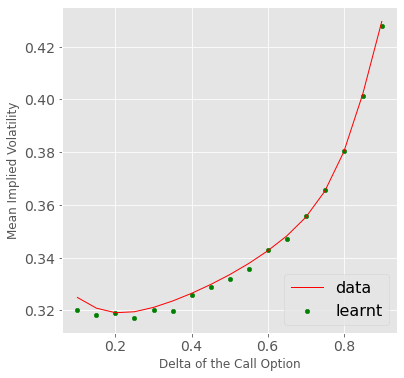

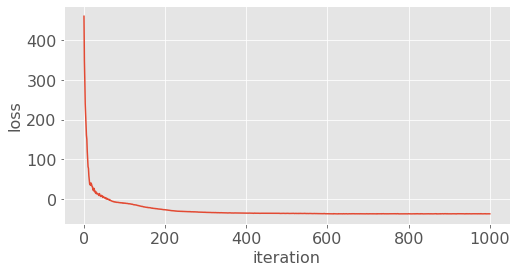

2000


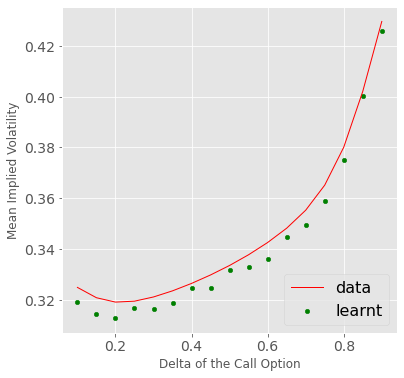

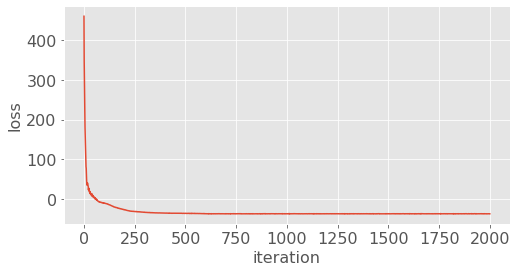

3000


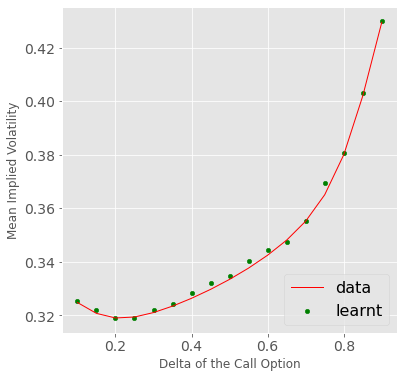

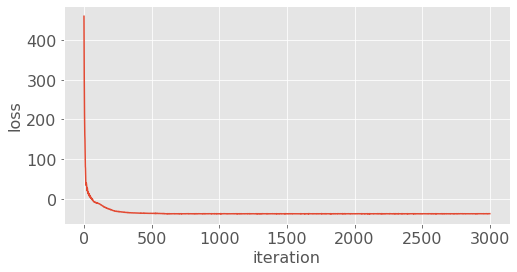

4000


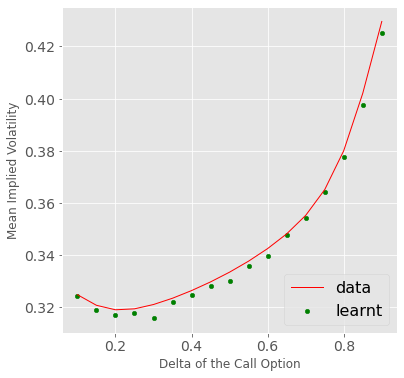

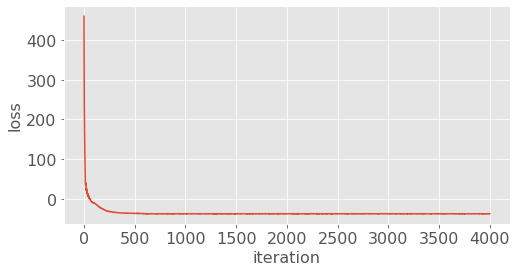

5000


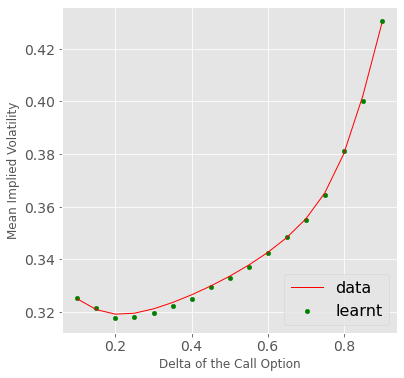

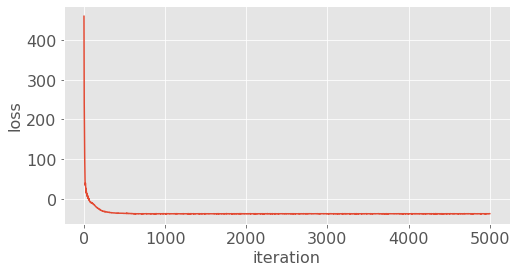

6000


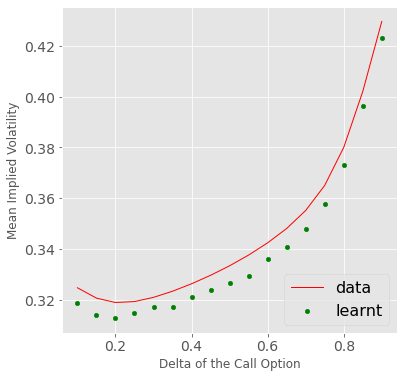

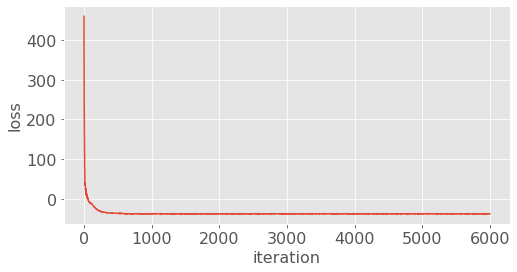

7000


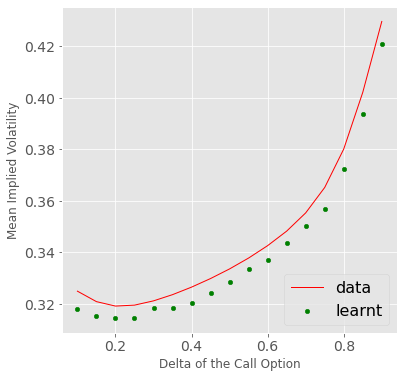

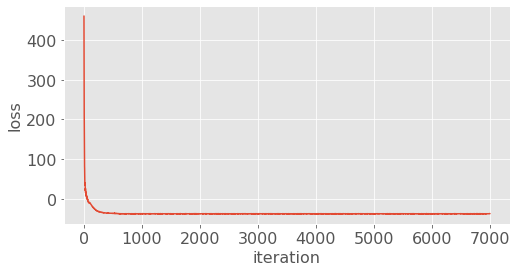

8000


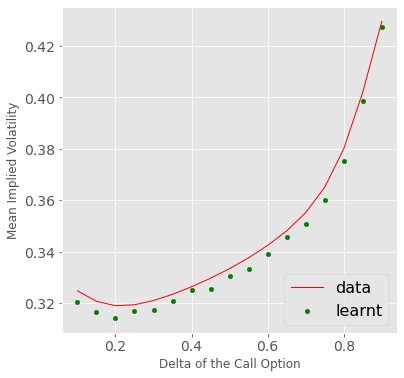

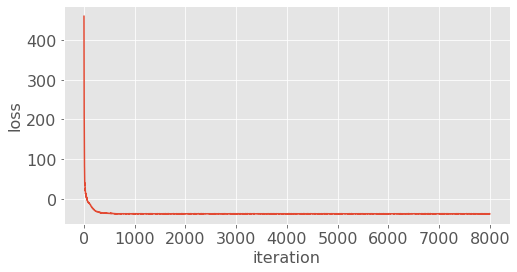

9000


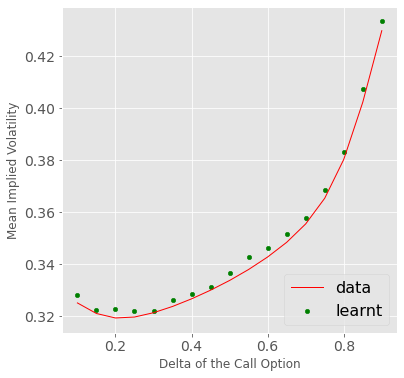

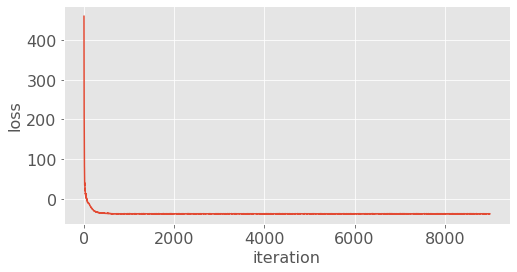

9999


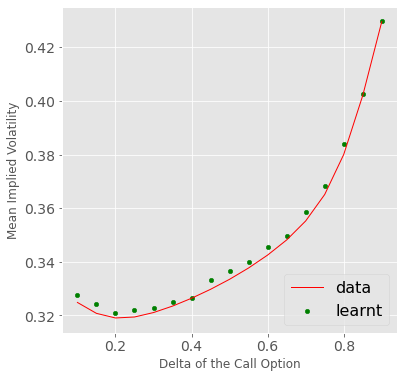

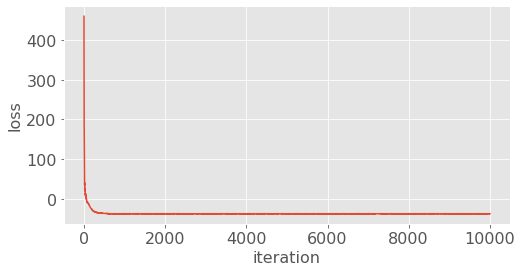

Finished Training


In [48]:
loss_hist = Fit_VAE_Net_combined(encode_net, decode_net, data=combined_IV, Nepochs = 10_000)